In [1]:
import numpy as np
import pandas as pd

# Seed agar hasil konsisten
np.random.seed(42)

# Data normal
data = np.random.normal(loc=50, scale=10, size=200)

# Tambahkan outlier ekstrem
outliers = np.array([150, 160, 170])
data = np.concatenate([data, outliers])

df = pd.DataFrame(data, columns=["nilai"])
df.head()

,nilai
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


# Statistical Methods

## A. Z-Score Method

In [2]:
from scipy.stats import zscore

# Hitung z-score
df["z_score"] = zscore(df["nilai"])

# Outlier jika |z| > 3
df["outlier_z"] = df["z_score"].abs() > 3

df[df["outlier_z"]]

,nilai,z_score,outlier_z
200,150.0,6.085732,True
201,160.0,6.701846,True
202,170.0,7.317960,True


## B. IQR Method

In [3]:
Q1 = df["nilai"].quantile(0.25)
Q3 = df["nilai"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["outlier_iqr"] = (df["nilai"] < lower_bound) | (df["nilai"] > upper_bound)

df[df["outlier_iqr"]]

,nilai,z_score,outlier_z,outlier_iqr
74,23.802549,-1.689470,False,True
113,74.632421,1.442230,False,True
179,77.201692,1.600526,False,True
200,150.000000,6.085732,True,True
201,160.000000,6.701846,True,True
202,170.000000,7.317960,True,True


# Visualization Methods

## A. Boxplot

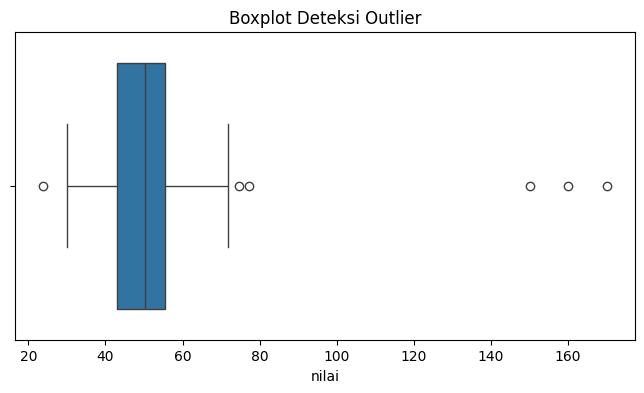

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=df["nilai"])
plt.title("Boxplot Deteksi Outlier")
plt.show()

## B. Histogram

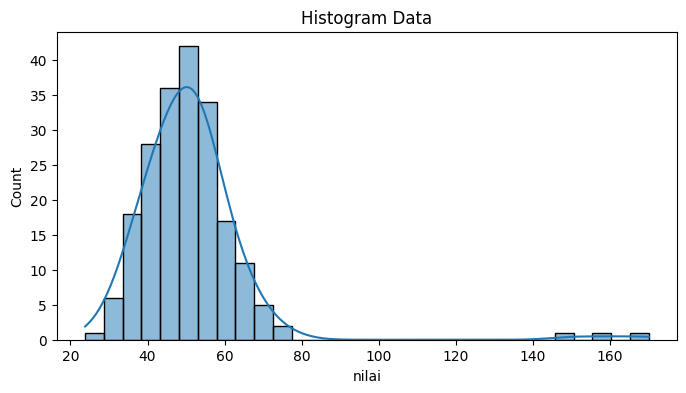

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df["nilai"], bins=30, kde=True)
plt.title("Histogram Data")
plt.show()

## C. Scatterplot

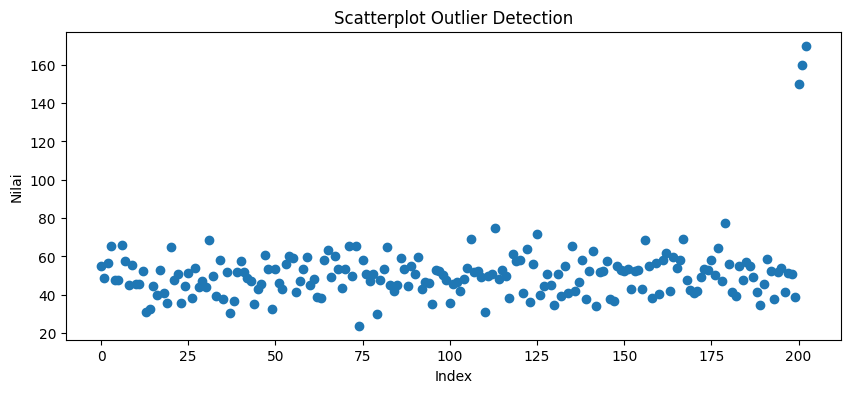

In [6]:
plt.figure(figsize=(10,4))
plt.scatter(range(len(df)), df["nilai"])
plt.title("Scatterplot Outlier Detection")
plt.xlabel("Index")
plt.ylabel("Nilai")
plt.show()

# Model-Based Methods

## A. Isolation Forest

In [7]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df["iso_pred"] = iso.fit_predict(df[["nilai"]])

# -1 = outlier, 1 = normal
df["outlier_iso"] = df["iso_pred"] == -1
df[df["outlier_iso"]]

,nilai,z_score,outlier_z,outlier_iqr,iso_pred,outlier_iso
37,30.403299,-1.282788,False,False,-1,True
49,32.369598,-1.161642,False,False,-1,True
74,23.802549,-1.689470,False,True,-1,True
79,30.124311,-1.299977,False,False,-1,True
113,74.632421,1.442230,False,True,-1,True
125,71.904556,1.274162,False,False,-1,True
167,68.967930,1.093233,False,False,-1,True
179,77.201692,1.600526,False,True,-1,True
200,150.000000,6.085732,True,True,-1,True
201,160.000000,6.701846,True,True,-1,True


## B. Local Outlier Factor (LOF)

In [8]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df["lof_pred"] = lof.fit_predict(df[["nilai"]])

# -1 = outlier
df["outlier_lof"] = df["lof_pred"] == -1
df[df["outlier_lof"]]

,nilai,z_score,outlier_z,outlier_iqr,iso_pred,outlier_iso,lof_pred,outlier_lof
13,30.867198,-1.254207,False,False,1,False,-1,True
37,30.403299,-1.282788,False,False,-1,True,-1,True
74,23.802549,-1.689470,False,True,-1,True,-1,True
79,30.124311,-1.299977,False,False,-1,True,-1,True
110,30.812288,-1.257590,False,False,1,False,-1,True
113,74.632421,1.442230,False,True,-1,True,-1,True
125,71.904556,1.274162,False,False,-1,True,-1,True
179,77.201692,1.600526,False,True,-1,True,-1,True
200,150.000000,6.085732,True,True,-1,True,-1,True
201,160.000000,6.701846,True,True,-1,True,-1,True


## Visualisasi Outlier Model-Based

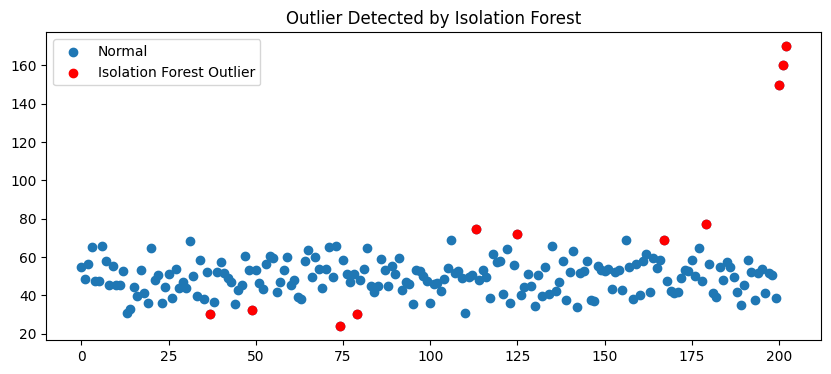

In [9]:
plt.figure(figsize=(10,4))
plt.scatter(range(len(df)), df["nilai"], label="Normal")
plt.scatter(df[df["outlier_iso"]].index, df[df["outlier_iso"]]["nilai"], color="red", label="Isolation Forest Outlier")
plt.legend()
plt.title("Outlier Detected by Isolation Forest")
plt.show()

Z-score
→ cocok untuk data normal distribution

IQR
→ robust untuk data skewed / non-normal

Isolation Forest
→ bagus untuk big data & multidimensional

LOF
→ mendeteksi anomali berbasis kepadatan lokal